$\textbf{Quantum Mechanics Application:}$

In this exercise, we have to estimate the Probability density and the Error of a particle moving in a potential well.

First of all, we have to write a function $arrayfill$ that fills an array with an analytical function, to be provided to an integration routine
as data. The function should take as arguments the array to be filled, the interval, the number of data points and the function to be evaluated. Which is given below:

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def array_fill(fn,a,b,n):
    x = np.linspace(a,b,n) #creates an array between [a,b] of n points
    y = fn(x)
    return x,y

Next, we have to Write a function for numerical integration using the Newton-Cotes with 2nd order polynomial. Assuming half an odd number of data points. The function should return not only the integrated value but also a measure of its error, E.

The Newtoon-Cotes with 2nd order Polynomial formula is given by;

$\int_a^b f(x) \, dx \approx \frac{h}{3} \left[ f(x_0) + 4 \sum_{i=1, \, \text{odd } i}^{n-1} f(x_i) + 2 \sum_{i=2, \, \text{even } i}^{n-2} f(x_i) + f(x_n) \right]$

also, the error estimation is given by;

$f_{0}^{(4)} = \frac{f_{2} - 4f_{1} + 6f_{0} - 4f_{-1} + f_{-2}}{h^{4}} + Oh^{(2)}$

$E = \frac{1}{90}h^{4}f^{(4)}(\chi_{1})$

the same in python is defined as follows:

In [14]:
def Newton_Cootes_2nd_Order(x,y,a,b,n):
    m = n // 2
    if n % 2 == 0: #condition for checking the odd number of points
        print("Must be odd number of points!")
        exit
    else:
        h = (x[-1] - x[0]) / (n - 1) #calculating the step size
        solution = y[0] + y[-1] + 4 * np.sum(y[1:n-1:2]) + 2 * np.sum(y[2:n-2:2])
        solution = solution * (h / 3) #final solution of the integral
        fourth_derivative =fn(x[m + 2]) - 4*fn(x[m + 1]) + 6*fn(x[m]) - 4*fn(x[m - 1]) + fn(x[m - 2])
        error = (1/90)*fourth_derivative #Error estimation
        return solution,error

$\textit{Application and Testing:}$

(a) Use both above functions to integrate the polynomial $f(x) = x + x^{3}$ in the interval $[0,1]$ with $n = 5$ datapoints.

In [15]:
def fn(x): #defining the given function
    return x + x**3
    
a = 0
b = 1
n = 5
x,y = array_fill(fn,a,b,n)
solution, error = Newton_Cootes_2nd_Order(x,y,a,b,n)
print("Solution is: ", solution)
print("Error is: ", error)

Solution is:  0.75
Error is:  0.0


(b) Suppose a particle in a potential well has a wavefunction of the form;

$\Psi(x,t) = 
\begin{cases} 
\frac{1}{\sqrt{L}} \left[ \sin\left(\frac{\pi x}{L}\right) e^{-i \omega_1 t} + \sin\left(\frac{2\pi x}{L}\right) e^{-i \omega_2 t} \right] & \text{if } 0 < x < L \\
0 & \text{otherwise}
\end{cases}$

The probability distribution of the particle $P_{(x,t)} = \mid{\psi_{(x,t)}}\mid^2$. Here, we have to find the probability that the particle is in the far right corner of the potential well;

$P(t \mid x \in [\frac{3L}{4},L]) = \int_{\frac{3L}{4}}^{L} P_{(x,t)} dx$

for time $t \in \{0,\frac{\pi}{\Delta\omega}\}$ where $\Delta\omega = \omega_{2} - \omega_{1}$ assuming $L = 2, \omega_{1} = 3, \omega_{2} = 4.5$ then comparing results for all odd data numbers $n \in [5,501]$. Also, for each $n$ we have to print $n$, $log(E)$ and $Log(h)$ in a file and then plot $Log(E)$ vs $Log(h)$ for both times.

First of all we have defines the given function and all the constants;

In [16]:
def psi(x,t,L,omega1,omega2):
    psi = (1/np.sqrt(L))*(np.sin(np.pi*x/L)*np.exp(-1j*omega1*t) + np.sin(2*np.pi*x/L)*np.exp(-1j*omega2*t))
    return np.abs(psi)**2

#All the constants
L = 2
omega1 = 3
omega2 = 4.5
del_omega = omega2 - omega1 

#Boundary condition
a = 3*L/4
b = L
n = np.arange(5,503,2) #array of n
time = [0,np.pi/del_omega] #array of the given two time values

Next, we created empty arrays of all the required outcomes, i.e., Solutions, Errors, and $h$, for both times, called the above-mentioned function for the solution, and plotted the mentioned arrays for both times.

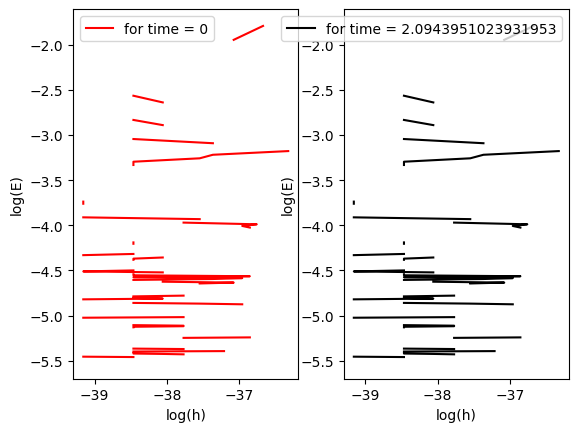

In [21]:
#Creating empty arrays
solutions_t1 = []
errors_t1 = []
h_t1 = []

solutions_t2 = []
errors_t2 = []
h_t2 = []

#solving using the Newton-Cootes 2nd Order function for different n values
for i in range(len(n)): #for first time
    x,y = array_fill(lambda x: psi(x,time[0],L,omega1,omega2),a,b,n[i])
    solution1,error1 = Newton_Cootes_2nd_Order(x,y,a,b,n[i])
    solutions_t1.append(solution1)
    errors_t1.append(error1)
    h_t1.append(L/(n[i] - 1))
 
for i in range(len(n)): #for second time
    x,y = array_fill(lambda x: psi(x,time[1],L,omega1,omega2),a,b,n[i])
    solution1,error1 = Newton_Cootes_2nd_Order(x,y,a,b,n[i])
    solutions_t2.append(solution1)
    errors_t2.append(error1)
    h_t2.append(L/(n[i] - 1))

#converting values to the logarithmic values for both times
errors_t1 = np.log(errors_t1)
h_t1 = np.log(h_t1)

errors_t2 = np.log(errors_t2)
h_t2 = np.log(h_t2)

#plotting of both outcomes
plt.figure("log(E) vs log(h)")
plt.subplot(1,2,1)
plt.plot(errors_t1,h_t1, label = f"for time = {time[0]}", color = "red")
plt.xlabel("log(h)")
plt.ylabel("log(E)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(errors_t2,h_t2, label = f"for time = {time[1]}", color = "black")
plt.xlabel("log(h)")
plt.ylabel("log(E)")
plt.legend()

plt.show()